In [87]:
#Nama : Rizki Fajar Kurniawan
#NIM : 19/442389/PA/19138

import sympy
import control as co
import control.matlab as mtl
import numpy as np
import matplotlib.pyplot as plt
s = sympy.Symbol('s')

In [88]:
#Transfer function
s = mtl.tf('s')
T = 1
sys = mtl.tf([1], [T, T/16,1])
print(sys)



        1
------------------
s^2 + 0.0625 s + 1



In [89]:
#Kd to transfer function
Kp = 1
Kd = [1,3,5,7,9]
sys1 = mtl.tf([Kd[0], Kp], [1])
sys2 = mtl.tf([Kd[1], Kp], [1])
sys3 = mtl.tf([Kd[2], Kp], [1])
sys4 = mtl.tf([Kd[3], Kp], [1])
sys5 = mtl.tf([Kd[4], Kp], [1])

In [90]:
#interconnection transfer function
fb1 = mtl.feedback(sys*sys1,1) 
fb2 = mtl.feedback(sys*sys2,1) 
fb3 = mtl.feedback(sys*sys3,1) 
fb4 = mtl.feedback(sys*sys4,1) 
fb5 = mtl.feedback(sys*sys5,1) 
fb = [fb1,fb2,fb3,fb4,fb5]

In [91]:
#timestamp ramp
T = 1
start = 0
stop = 10
increment = 0.1
t = np.arange(start, stop, increment)

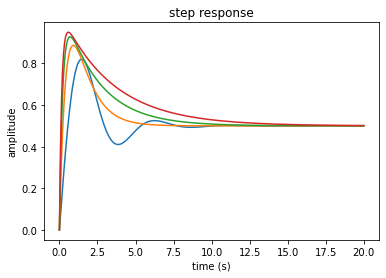

In [92]:
for i in range(4):
    t = np.linspace(0, 20, 300)
    _, y = co.step_response(fb[i], t)
    plt.plot(t, y)
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.title('step response')
    plt.grid()


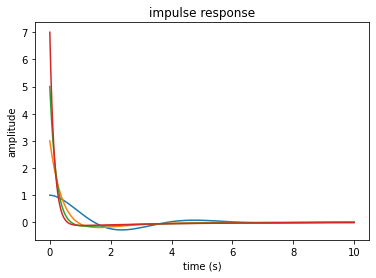

In [93]:
for i in range(4):
    t = np.linspace(0, 10, 300) 
    _, y = co.impulse_response(fb[i], t) 
    plt.plot(t, y)
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.title('impulse response')
    plt.grid()


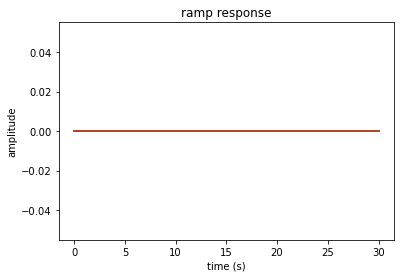

In [94]:
for i in range(4):    
    t = np.linspace(0, 30, 300)
    _, y = co.forced_response(fb[i], t) 
    plt.plot(t, y) 
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.title('ramp response')
    plt.grid()